<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/LabWk3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Create the Dataframe (df)
df = pd.read_csv('/content/discoveries.csv')

print(df)

          date  Y
0   1860-01-01  5
1   1861-01-01  3
2   1862-01-01  0
3   1863-01-01  2
4   1864-01-01  0
..         ... ..
95    1/1/1955  1
96    1/1/1956  0
97    1/1/1957  0
98    1/1/1958  2
99    1/1/1959  0

[100 rows x 2 columns]


In [ ]:
# Data Wrangling
df.shape

df.info()

df.describe()

df.isnull().sum()

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    100 non-null    object
 1   Y       100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


np.int64(0)

In [ ]:
df.tail(7)

df.head(3)

,date,Y
0,1860-01-01,5
1,1861-01-01,3
2,1862-01-01,0


In [ ]:
# Extracting the Year
df['Year'] = pd.DatetimeIndex(df['date']).year

print(df)

          date  Y  Year
0   1860-01-01  5  1860
1   1861-01-01  3  1861
2   1862-01-01  0  1862
3   1863-01-01  2  1863
4   1864-01-01  0  1864
..         ... ..   ...
95    1/1/1955  1  1955
96    1/1/1956  0  1956
97    1/1/1957  0  1957
98    1/1/1958  2  1958
99    1/1/1959  0  1959

[100 rows x 3 columns]


In [ ]:
# Set Year as an Index
#df['Year'] = pd.DatetimeIndex(df['date']).year
df = df.set_index('Year')

print(df)

            date  Y
Year               
1860  1860-01-01  5
1861  1861-01-01  3
1862  1862-01-01  0
1863  1863-01-01  2
1864  1864-01-01  0
...          ... ..
1955    1/1/1955  1
1956    1/1/1956  0
1957    1/1/1957  0
1958    1/1/1958  2
1959    1/1/1959  0

[100 rows x 2 columns]


In [ ]:
# Let's Drop date
df = df.drop('date', axis=1)

print(df)

      Y
Year   
1860  5
1861  3
1862  0
1863  2
1864  0
...  ..
1955  1
1956  0
1957  0
1958  2
1959  0

[100 rows x 1 columns]


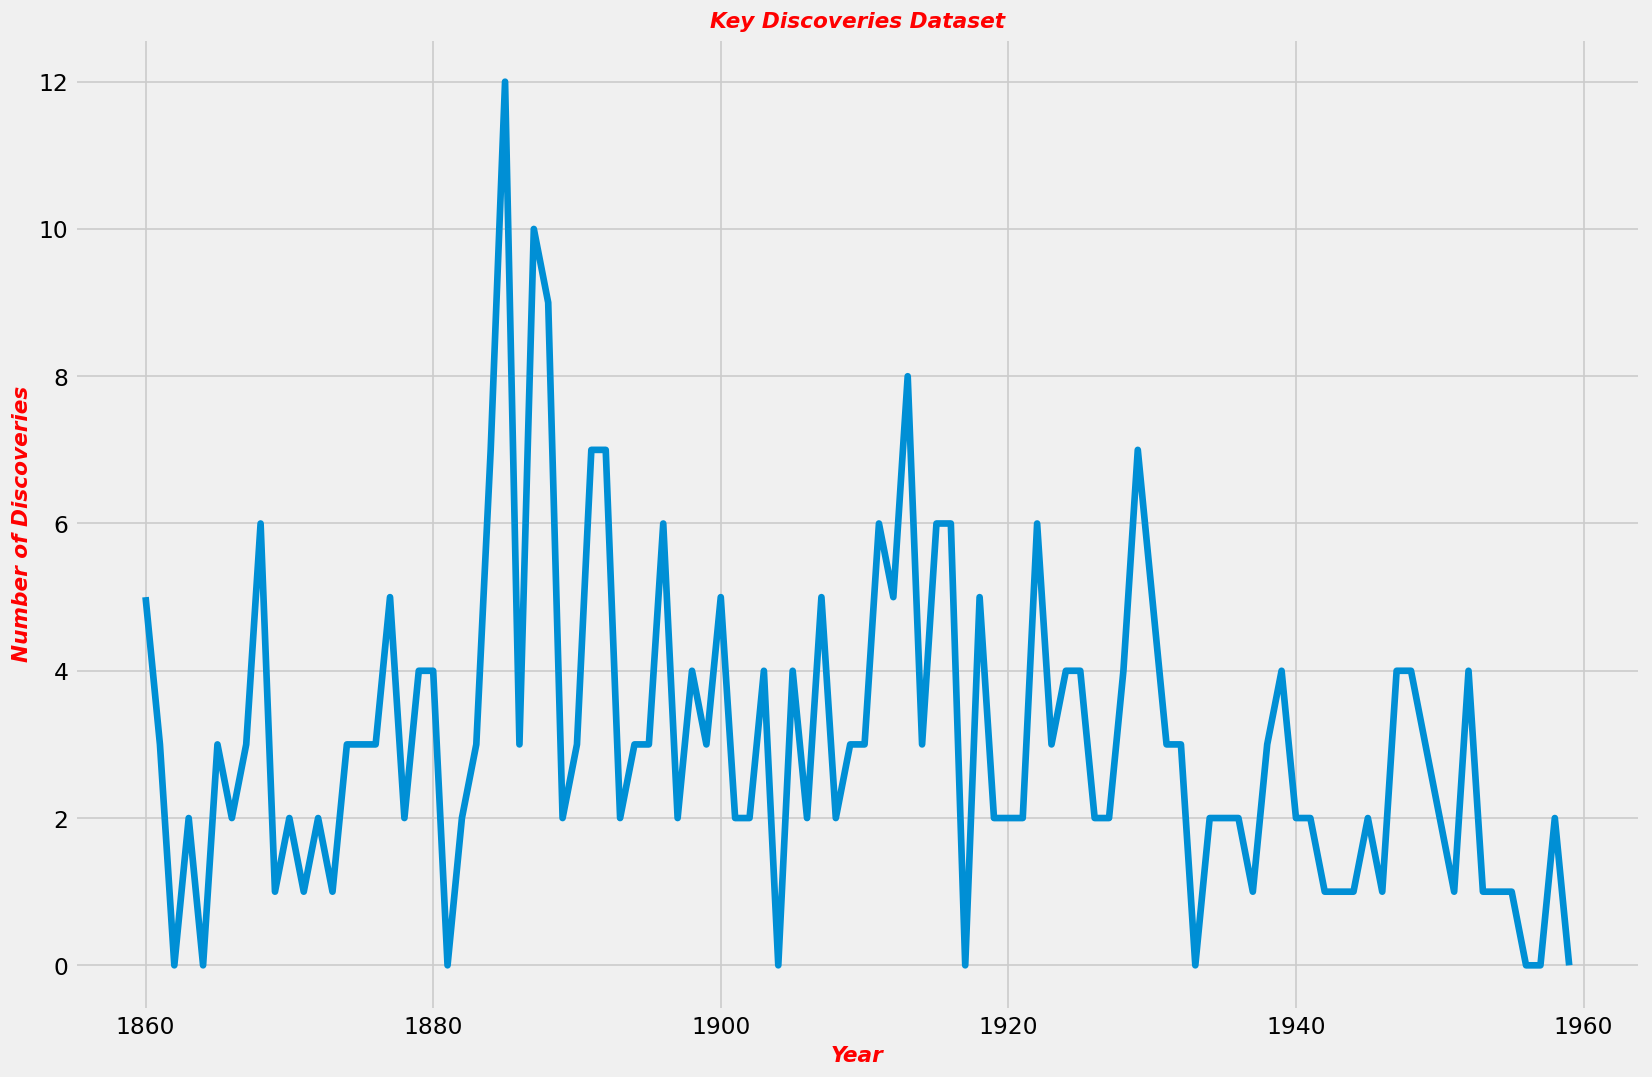

In [ ]:
# Let's Plot the Major Discoveries Dataset
#plt.style.available()
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10), dpi = 120)
plt.title('Key Discoveries Dataset', color = 'red',  fontdict = {'fontweight':'bold', 'fontstyle':'italic','fontsize':13} )
plt.xlabel('Year', color = 'red', fontdict = {'fontweight':'bold', 'fontstyle':'italic','fontsize':13})
plt.ylabel('Number of Discoveries', color = 'red', fontdict = {'fontweight':'bold', 'fontstyle':'italic','fontsize':13})
plt.plot(df)
plt.show()

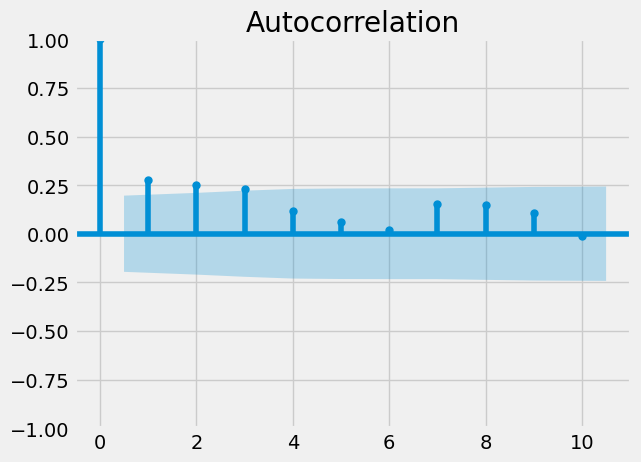

In [ ]:
# Let's Determine the Autocorrelation Values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('fivethirtyeight')
plot_acf(df, lags = 10)
plt.show()
"""
The autocorrelatio allow us to determine the relation between the plot at time t and its lags.
In this particular case it is about error that we are carrying, which will bew the error carried forward: moving average MA(q =1,2,3)
"""

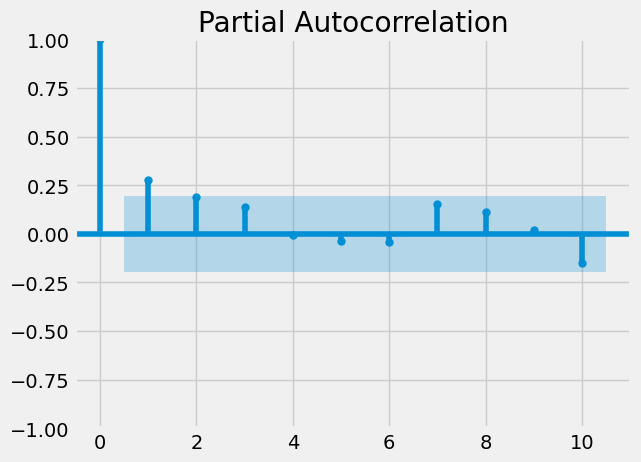

In [ ]:
# Plotting the Autocorrelation function PACF
plot_pacf(df, lags = 10) # The blue shade is covering the lags that are not significant.
plt.show()

# NB: The partial autocoorrelation, allow us to determine the value p related AutoRegressive part AR (p =1)

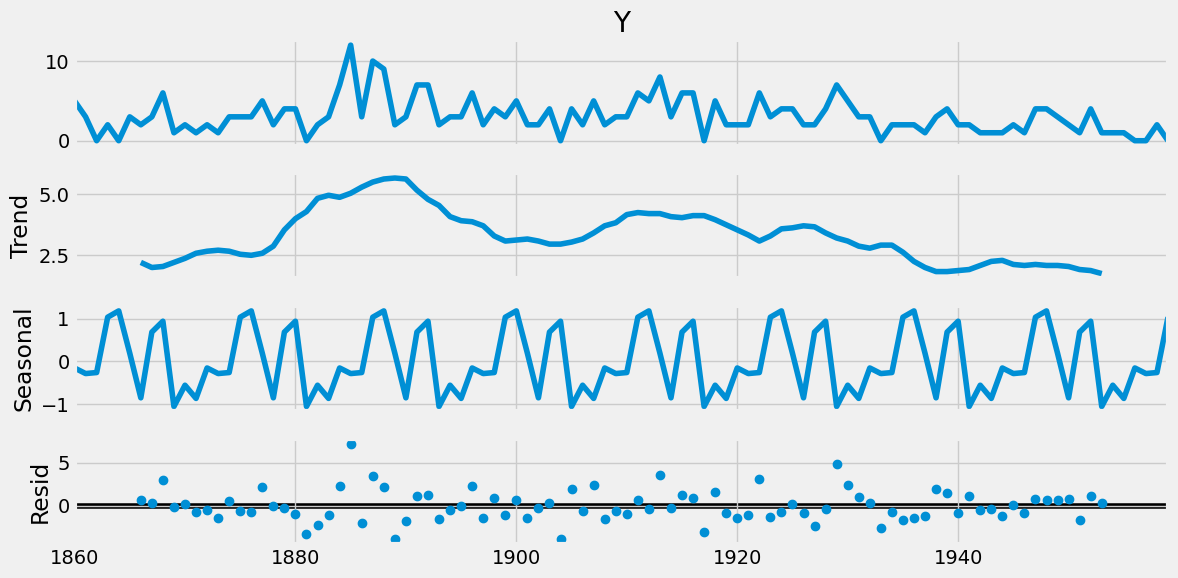

In [ ]:
# Let's Perform the Time Series Decomposition
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (12, 6) # making the figure bigger
decomposition = sm.tsa.seasonal_decompose(df['Y'], period = 12)
fig = decomposition.plot()
plt.show()
#